# A comparison of Google Maps routes vs cycle.travel routes


In [24]:
import gpxpy
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.transforms as mtransforms
import json
import pandas
import numpy as np

In [25]:
GOOGLE_ROUTE = "../data/cycle.travel/BHM_TO_CAM_from_google.gpx"
CYCLE_TRAVEL_ROUTE = "../data/cycle.travel/BHM_TO_CAM.gpx"

GOOGLE_ROUTE_STATS = "../data/cycle.travel/BHM_TO_CAM_from_google.json"
CYCLE_TRAVEL_ROUTE_STATS = "../data/cycle.travel/BHM_TO_CAM.json"

In [26]:
def get_xy_from_gpx(gpx_filename: str):
    gpx_file = open(gpx_filename, "r")
    gpx = gpxpy.parse(gpx_file)
    x = []
    y = []
    for track in gpx.tracks:
        for segment in track.segments:
            for point in segment.points:
                x.append(point.longitude)
                y.append(point.latitude)
    return x, y


Let's first plot the routes on a figure


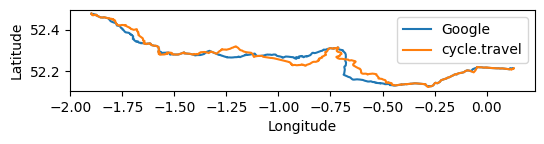

In [27]:
google_coords = get_xy_from_gpx(GOOGLE_ROUTE)
cycle_travel_coords = get_xy_from_gpx(CYCLE_TRAVEL_ROUTE)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
ax.plot(google_coords[0], google_coords[1], label="Google")
ax.plot(cycle_travel_coords[0], cycle_travel_coords[1], label="cycle.travel")
ax.set_aspect("equal")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.legend()
plt.show()


Let's get the statistics from the json files


In [28]:
# json looks like
# {
#     "total_length": 211,
#     "total_time": "13:28",
#     "road_types": {
#       "busy_road": 2.4,
#       "paved_road": 155,
#       "paved_path": 48.3,
#       "unpaved_path": 5.3,
#       "pushing": 0.58
#     },
# }
with open(GOOGLE_ROUTE_STATS) as f:
    google_stats = json.load(f)
with open(CYCLE_TRAVEL_ROUTE_STATS) as f:
    cycle_travel_stats = json.load(f)

Now let's make a bar chart of the statistics


In [29]:
df = pandas.DataFrame(
    {
        "Google Route": google_stats["road_types"],
        "Cycle.travel Route": cycle_travel_stats["road_types"],
    }
)
df


,Google Route,Cycle.travel Route
busy_road,46.8,2.40
paved_road,90.5,155.00
paved_path,32.6,48.30
unpaved_path,21.1,5.30
pushing,6.6,0.58


[0.2025, 0.3575, 0.5125, 0.6675, 0.8225]


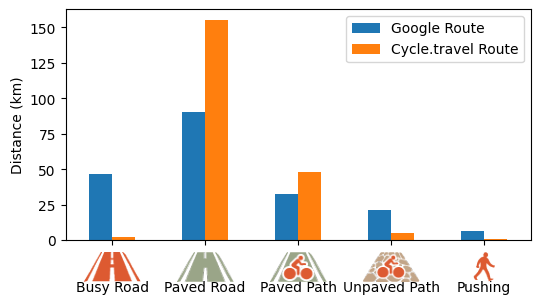

In [31]:
fig = plt.figure(figsize=(6, 3))
ax = fig.add_subplot(111)

iconpaths = [
    "./route_type_icons/busy_road.png",
    "./route_type_icons/paved_road.png",
    "./route_type_icons/paved_path.png",
    "./route_type_icons/unpaved_path.png",
    "./route_type_icons/pushing.png",
]

df.plot.bar(ax=ax)

# use icons for xticks
xl, yl, xh, yh = np.array(ax.get_position()).ravel()
axwidth = xh - xl
axheight = yh - yl
imgsize = 0.1
xlim = ax.get_xlim()
positions = []
for i in range(5):
    start = xlim[0]
    end = xlim[1]
    positions.append(xl + axwidth * ((i - start) / (end - start)))
print(positions)

for position, iconpath in zip(positions, iconpaths):
    imgax = fig.add_axes(
        [position - imgsize / 2, yl - imgsize * 1.4, imgsize, imgsize],
    )
    imgax.axis("off")
    imgax.imshow(mpimg.imread(iconpath))

# add padding to xticks
offset = mtransforms.Affine2D().translate(0, -300 * imgsize)
for label in ax.xaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)
newticks = [tick.get_text().replace("_", " ").title() for tick in ax.get_xticklabels()]
ax.set_xticklabels(
    newticks,
    rotation=0,
)

ax.set_ylabel("Distance (km)")

plt.show()

fig.patch.set_facecolor("none")
fig.savefig(
    "../images/google_vs_cycletravel_stats.svg",
    bbox_inches="tight",
    dpi=300,
    transparent=True,
    facecolor="none",
)